<a href="https://colab.research.google.com/github/Gail529/Insurance-Fraud/blob/main/Insurance__fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 6.0 MB/s 


loading the necessary libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder 

from sklearn.covariance import EllipticEnvelope


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest


import warnings
warnings.filterwarnings(action='ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
data = pd.read_csv('/content/insurance_claims.csv')
data.head(5)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [76]:
del[data['policy_bind_date']]
del[data['policy_number']]
del[data['policy_csl']]
del[data['_c39']]
del[data['incident_date']]

general info about the dataset

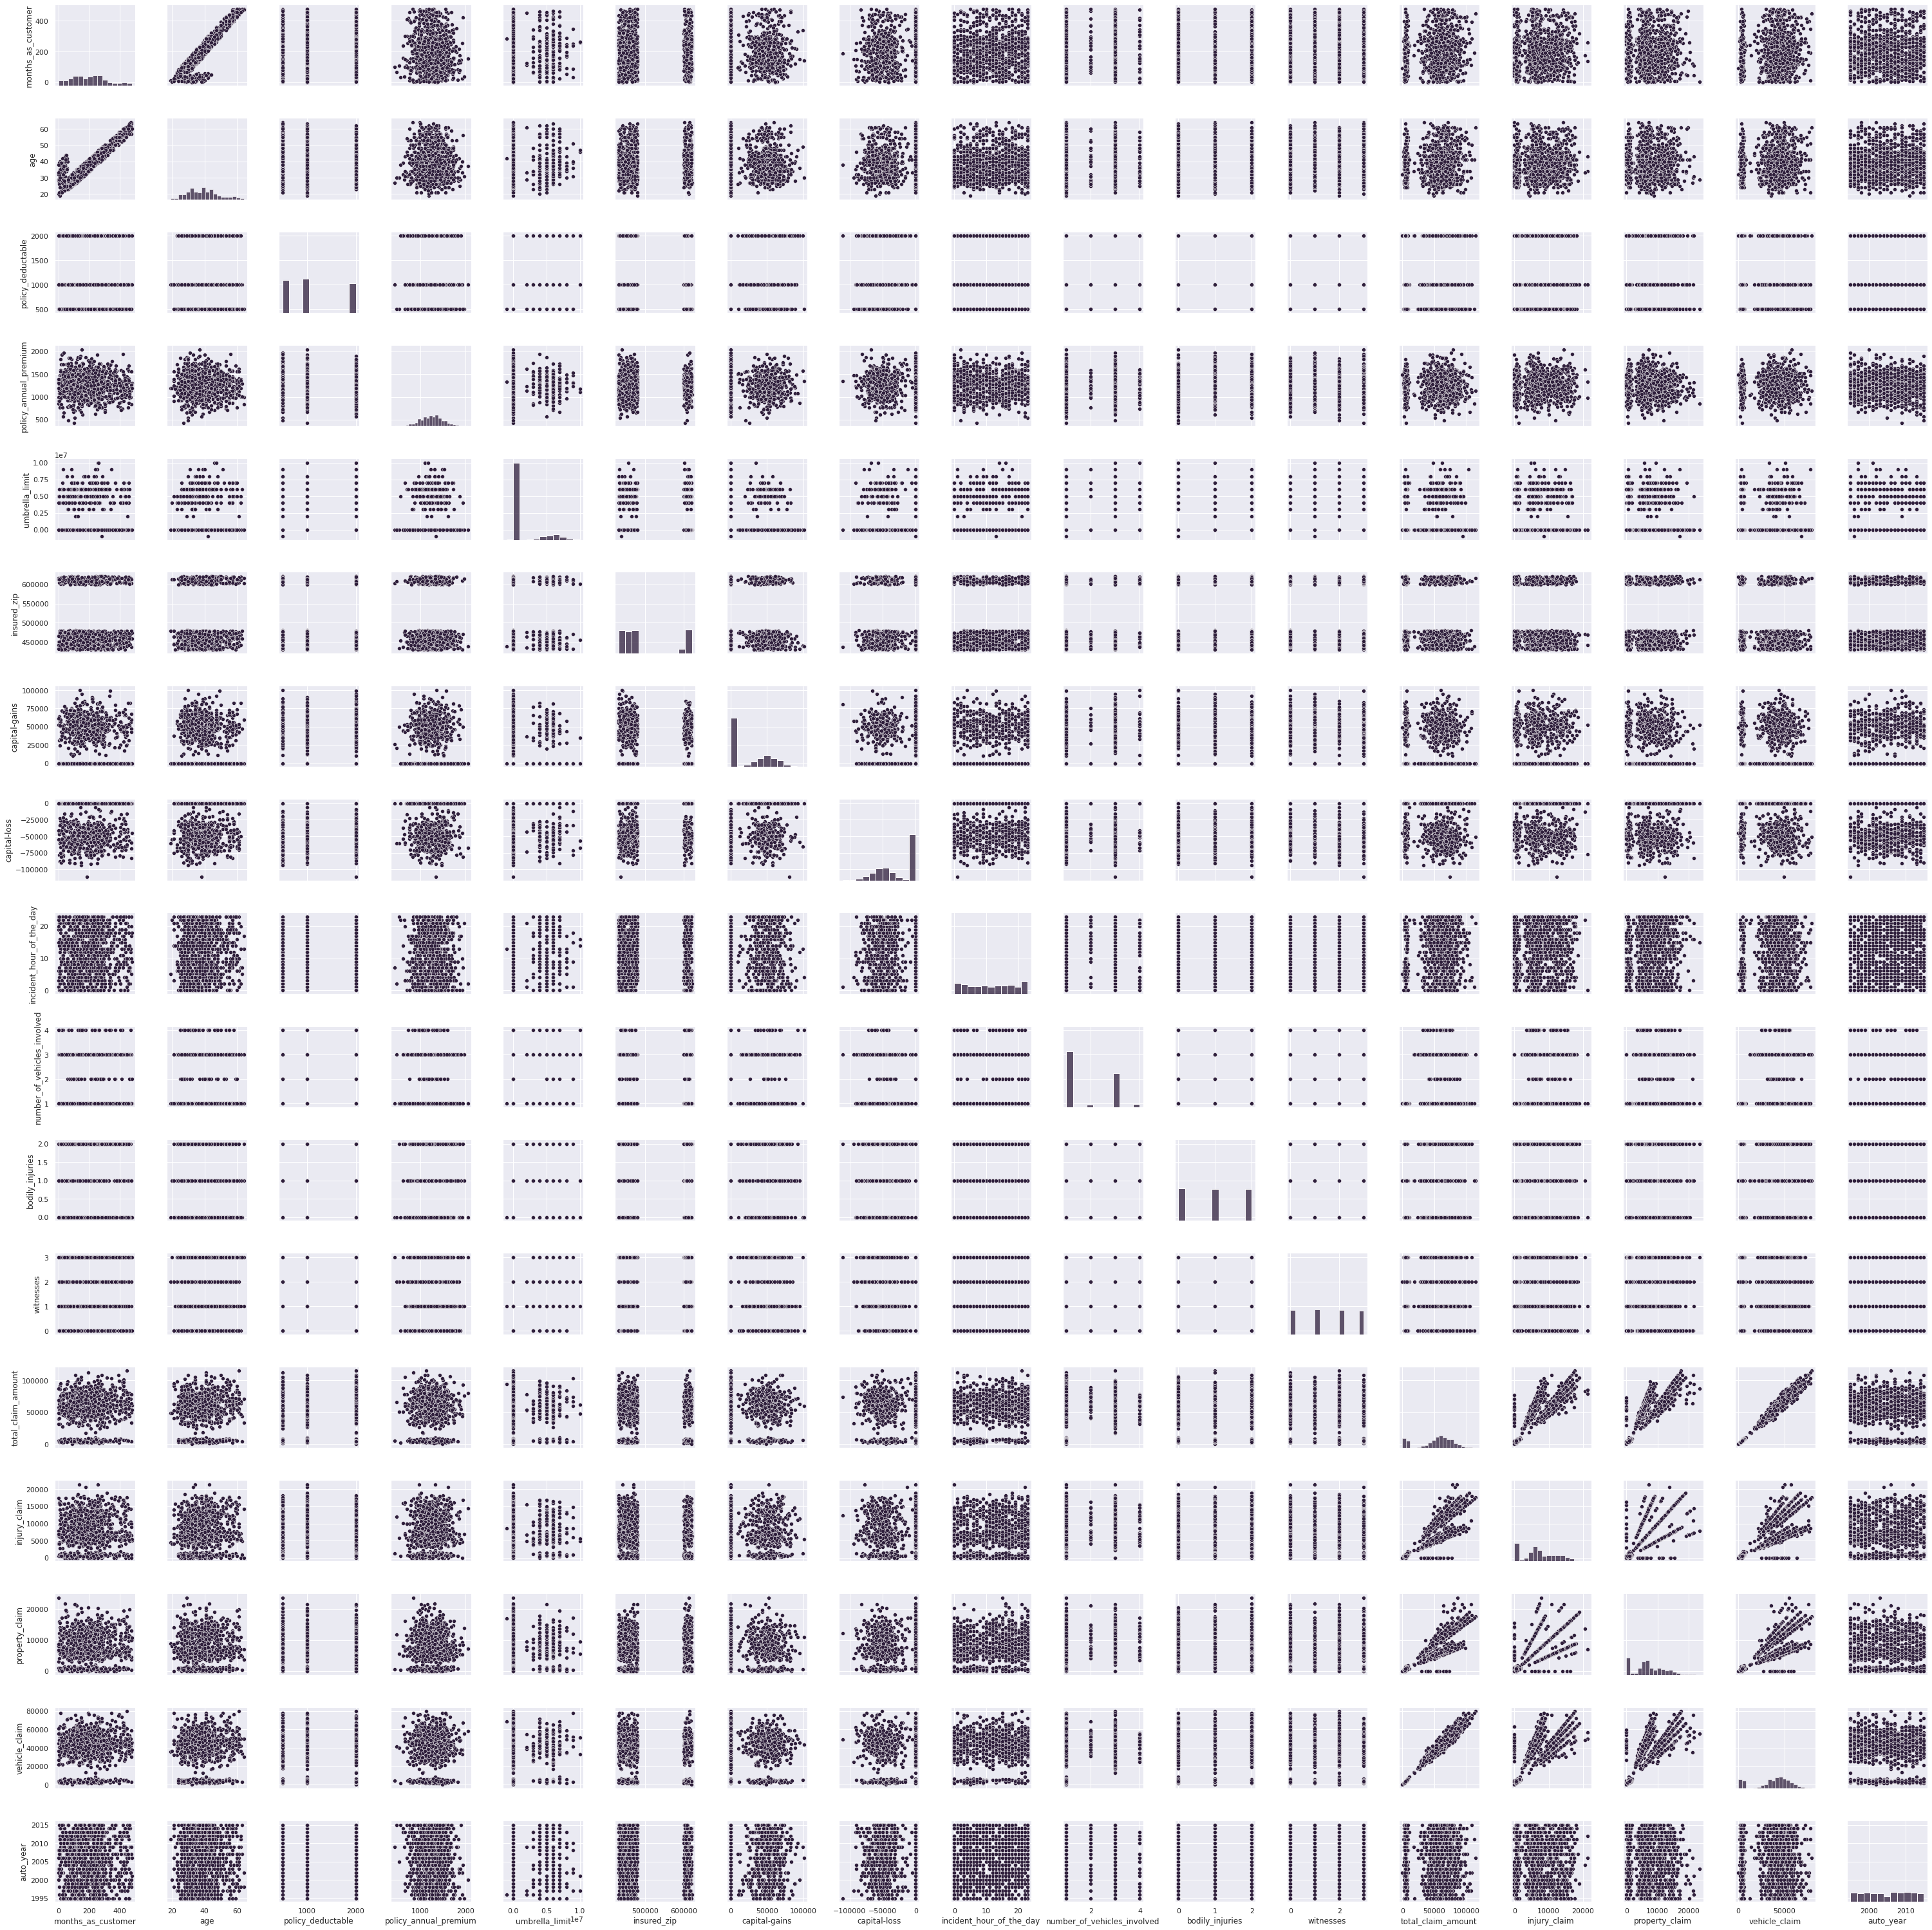

In [45]:
sns.pairplot(data)

In [ ]:
data.info()

In [77]:
#dropping the _c39 column since it is full of NANs
data.dropna(axis=1,inplace=True)
data.isnull().sum().sum()


0

In [78]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# EDA

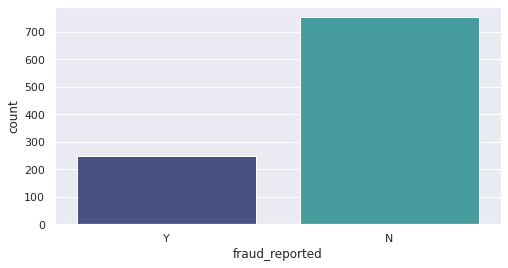

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x="fraud_reported",data=data,palette="mako")

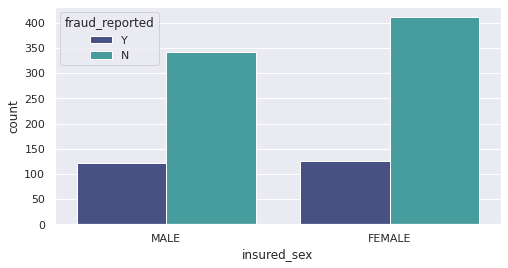

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x="insured_sex",data=data,hue='fraud_reported',palette="mako")

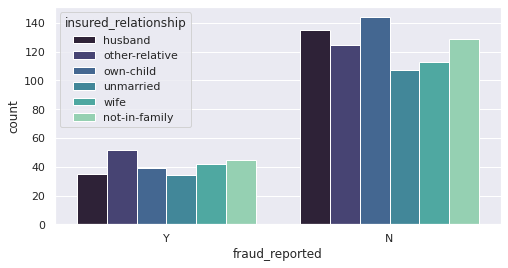

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
ax = sns.countplot(x="fraud_reported",data=data,hue='insured_relationship',palette="mako")

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,6))
ax =sns.boxplot(x=data['age'])

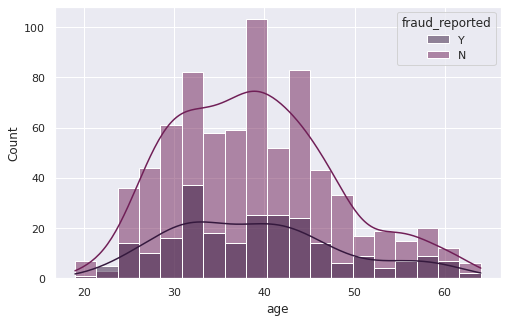

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data,x="age",kde=True,hue='fraud_reported')

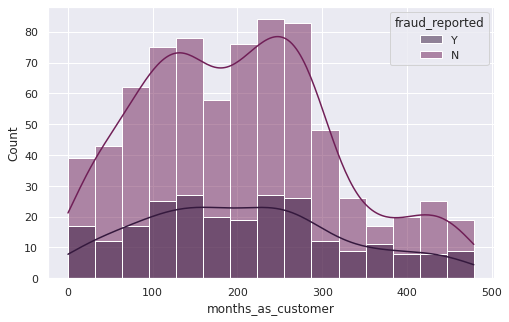

In [ ]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data,x="months_as_customer",kde=True,hue='fraud_reported')

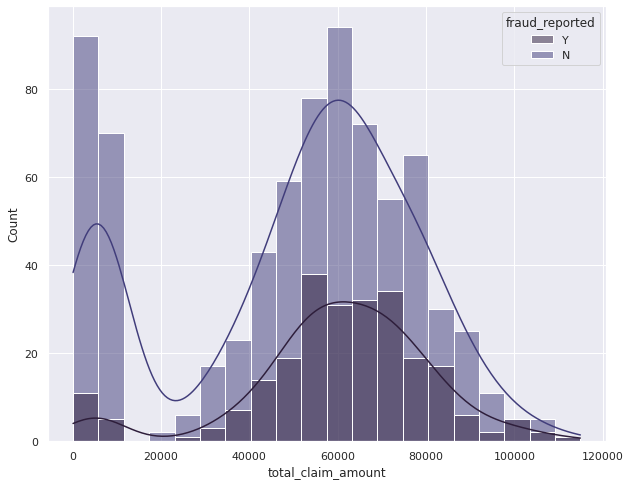

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,8))
ax =  sns.histplot(data,x="total_claim_amount",kde=True,hue='fraud_reported')

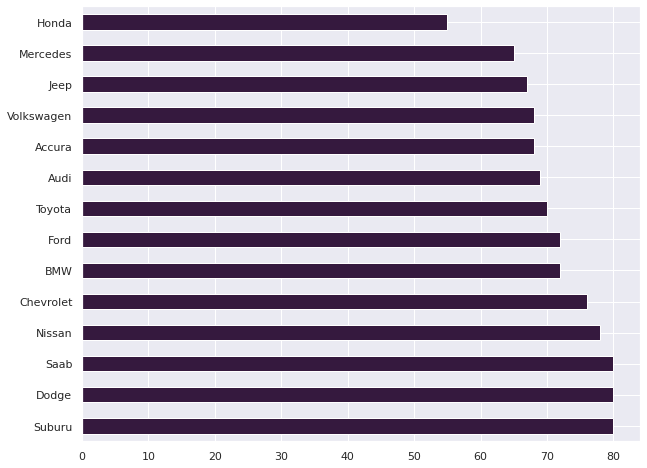

In [ ]:
sns.set_theme(style='darkgrid',palette='rocket')
plt.figure(figsize=(10,8))
plot = data['auto_make'].value_counts().head(20).plot(kind="barh")

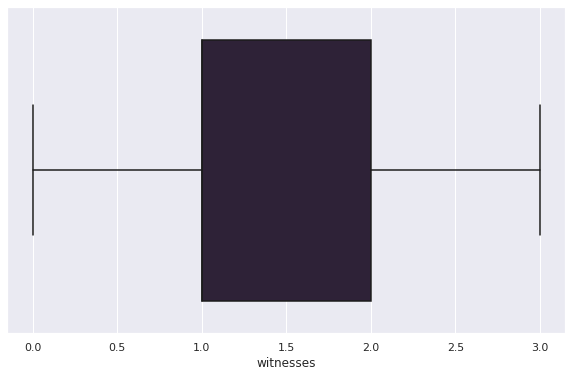

In [ ]:
sns.set_theme(style='darkgrid',palette='mako')
plt.figure(figsize=(10,6))
ax =sns.boxplot(x=data[''])

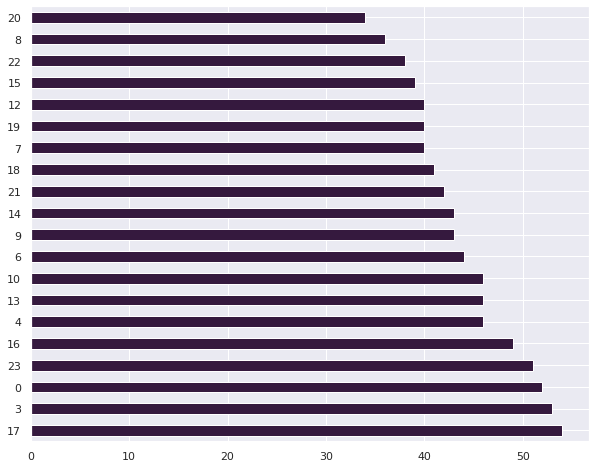

In [ ]:
sns.set_theme(style='darkgrid',palette='rocket')
plt.figure(figsize=(10,8))
plot = data['incident_hour_of_the_day'].value_counts().head(20).plot(kind="barh")

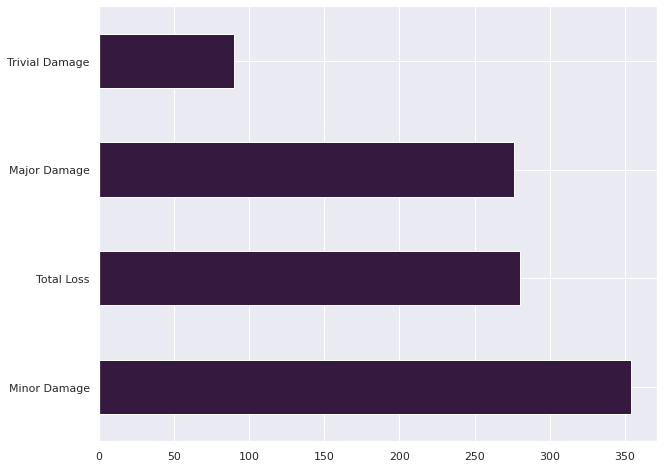

In [ ]:
sns.set_theme(style='darkgrid',palette='rocket')
plt.figure(figsize=(10,8))
plot = data['incident_severity'].value_counts().head(20).plot(kind="barh")

# Feature Scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(data)
# transform training data
data = norm.transform(data)


In [79]:
#standardisation
from sklearn import preprocessing 
#['months_as_customer','age','policy_number','policy_deductable ','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']
cols=['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 
data[cols]=scaled_cols



Standardised columns : 
 [[ 1.07813958  0.99083647 -0.22238259 ... -0.18928317  1.16550497
   0.74965272]
 [ 0.2089946   0.33407345  1.41278352 ... -1.36382194 -1.37269599
  -1.82334593]
 [-0.60800168 -1.08891308  1.41278352 ...  0.05464372 -0.73607206
  -0.78556451]
 ...
 [-0.64276748 -0.54161057 -1.03996564 ...  0.01364761  0.0208261
   0.77190224]
 [ 2.20802805  2.52328351  1.41278352 ... -0.45370813 -0.45197603
  -0.07357971]
 [ 2.19064515  2.3043625  -0.22238259 ... -1.42941572 -1.34366428
  -1.81434017]]


# Encoding categorical  variables

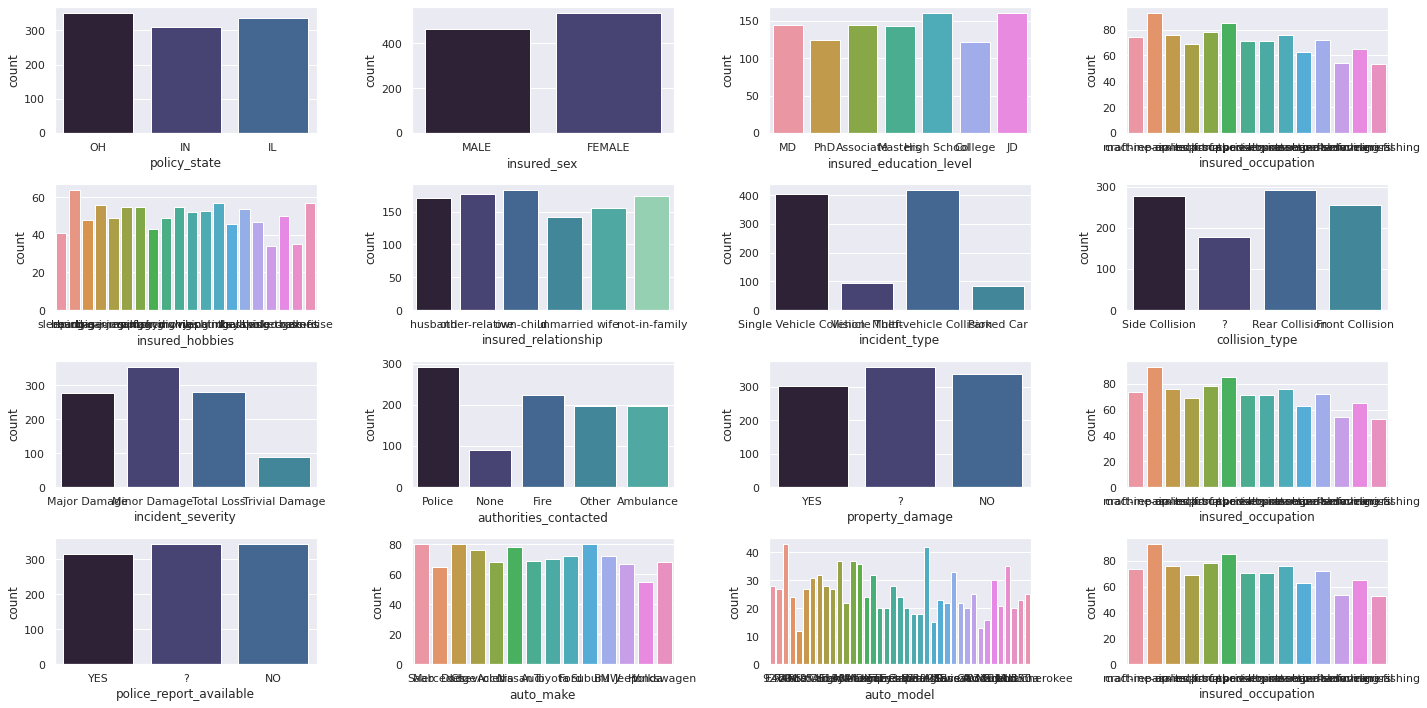

In [ ]:
#looking for categorical variables with high cardinality
sns.set_theme(style='darkgrid',palette="mako")

fig,ax = plt.subplots(4,4, figsize=(20,10), sharex=False)

sns.countplot(data['policy_state'], ax=ax[0,0])
sns.countplot(data['insured_sex'], ax=ax[0,1])
sns.countplot(data['insured_education_level'], ax=ax[0,2])
sns.countplot(data['insured_occupation'], ax=ax[0,3])
sns.countplot(data['insured_hobbies'], ax=ax[1,0])
sns.countplot(data['insured_relationship'], ax=ax[1,1])
sns.countplot(data['incident_type'], ax=ax[1,2])
sns.countplot(data['collision_type'], ax=ax[1,3])
sns.countplot(data['incident_severity'], ax=ax[2,0])
sns.countplot(data['authorities_contacted'], ax=ax[2,1])
sns.countplot(data['property_damage'], ax=ax[2,2])
sns.countplot(data['insured_occupation'], ax=ax[2,3])
sns.countplot(data['police_report_available'], ax=ax[3,0])
sns.countplot(data['auto_make'], ax=ax[3,1])
sns.countplot(data['auto_model'], ax=ax[3,2])
sns.countplot(data['insured_occupation'], ax=ax[3,3])

plt.tight_layout()

Label Encoder <br>
Frequency Encoder/Binary/target<br>
OHE 



In [ ]:
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [80]:
# label encoding the data for TARGET variable
le = LabelEncoder() 
data['fraud_reported']= le.fit_transform(data['fraud_reported'])


#['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

#for categorical_cols with high cardinality
#binary encoding
encoder= ce.BinaryEncoder(cols=['auto_make','auto_model','insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_state', 'incident_city', 'incident_location'])
data_encoded=encoder.fit_transform(data) 
data=data_encoded

#One hot encoding
OHE_cols = ['police_report_available', 'property_damage', 'insured_sex', 'policy_state','collision_type','incident_type','incident_severity','authorities_contacted'] 
data= pd.get_dummies(data, columns = OHE_cols)


In [26]:
data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_education_level_0,insured_education_level_1,insured_education_level_2,insured_education_level_3,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,insured_occupation_4,insured_hobbies_0,insured_hobbies_1,insured_hobbies_2,insured_hobbies_3,insured_hobbies_4,insured_hobbies_5,insured_relationship_0,insured_relationship_1,insured_relationship_2,insured_relationship_3,capital-gains,capital-loss,incident_date,incident_state_0,incident_state_1,incident_state_2,incident_state_3,incident_city_0,incident_city_1,incident_city_2,incident_city_3,incident_location_0,incident_location_1,incident_location_2,incident_location_3,...,auto_make_3,auto_make_4,auto_model_0,auto_model_1,auto_model_2,auto_model_3,auto_model_4,auto_model_5,auto_model_6,auto_year,fraud_reported,_c39,police_report_available_?,police_report_available_NO,police_report_available_YES,property_damage_?,property_damage_NO,property_damage_YES,insured_sex_FEMALE,insured_sex_MALE,policy_state_IL,policy_state_IN,policy_state_OH,collision_type_?,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,1406.91,0,466132,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,53300,0,2015-01-25,0,0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2004,1,NaN,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
1,228,42,2000,1197.22,5000000,468176,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,2015-01-21,0,0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,2007,1,NaN,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,430632,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,35100,0,2015-02-22,0,0,1,1,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,1,1,2007,0,NaN,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,256,41,2000,1415.74,6000000,608117,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,48900,-62400,2015-01-10,0,1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2014,1,NaN,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
4,228,44,1000,1583.91,6000000,610706,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,66000,-46000,2015-02-17,0,0,1,1,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,2009,0,NaN,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,2015-02-22,0,1,1,0,0,1,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,2006,0,NaN,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
996,285,41,1000,1436.79,0,608177,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,70900,0,2015-01-24,0,0,0,1,0,1,1,0,0,1,1,1,...,1,0,0,0,1,1,1,0,0,2015,0,NaN,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0
997,130,34,500,1383.49,3000000,442797,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,35100,0,2015-01-23,0,1,1,0,0,0,1,1,0,1,1,1,...,1,0,0,0,1,0,0,1,0,1996,0,NaN,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1
998,458,62,2000,1356.92,5000000,441714,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,2015-02-26,0,0,1,1,0,0,1,1,0,1,1,1,...,1,1,0,0,0,1,0,0,0,1998,0,NaN,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0


Using frequency encoding

In [ ]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])


#frequency encoding for the categorical_cols with high cardinality
fe1= data.groupby('opening_eco').size()/len(data)
data.loc[:,'opening_encode']=data['opening_eco'].map(fe1)
fe_data=data.drop(columns=['opening_eco'],axis=1)


fe2= data.groupby('increment_code').size()/len(data)
data.loc[:,'incr_encode']=data['increment_code'].map(fe2)
fe_data=fe_data.drop(columns=['increment_code'],axis=1)



['increment_code', 'opening_eco']


# Feature Engineering
#### Feature Importance using RANDOM FOREST




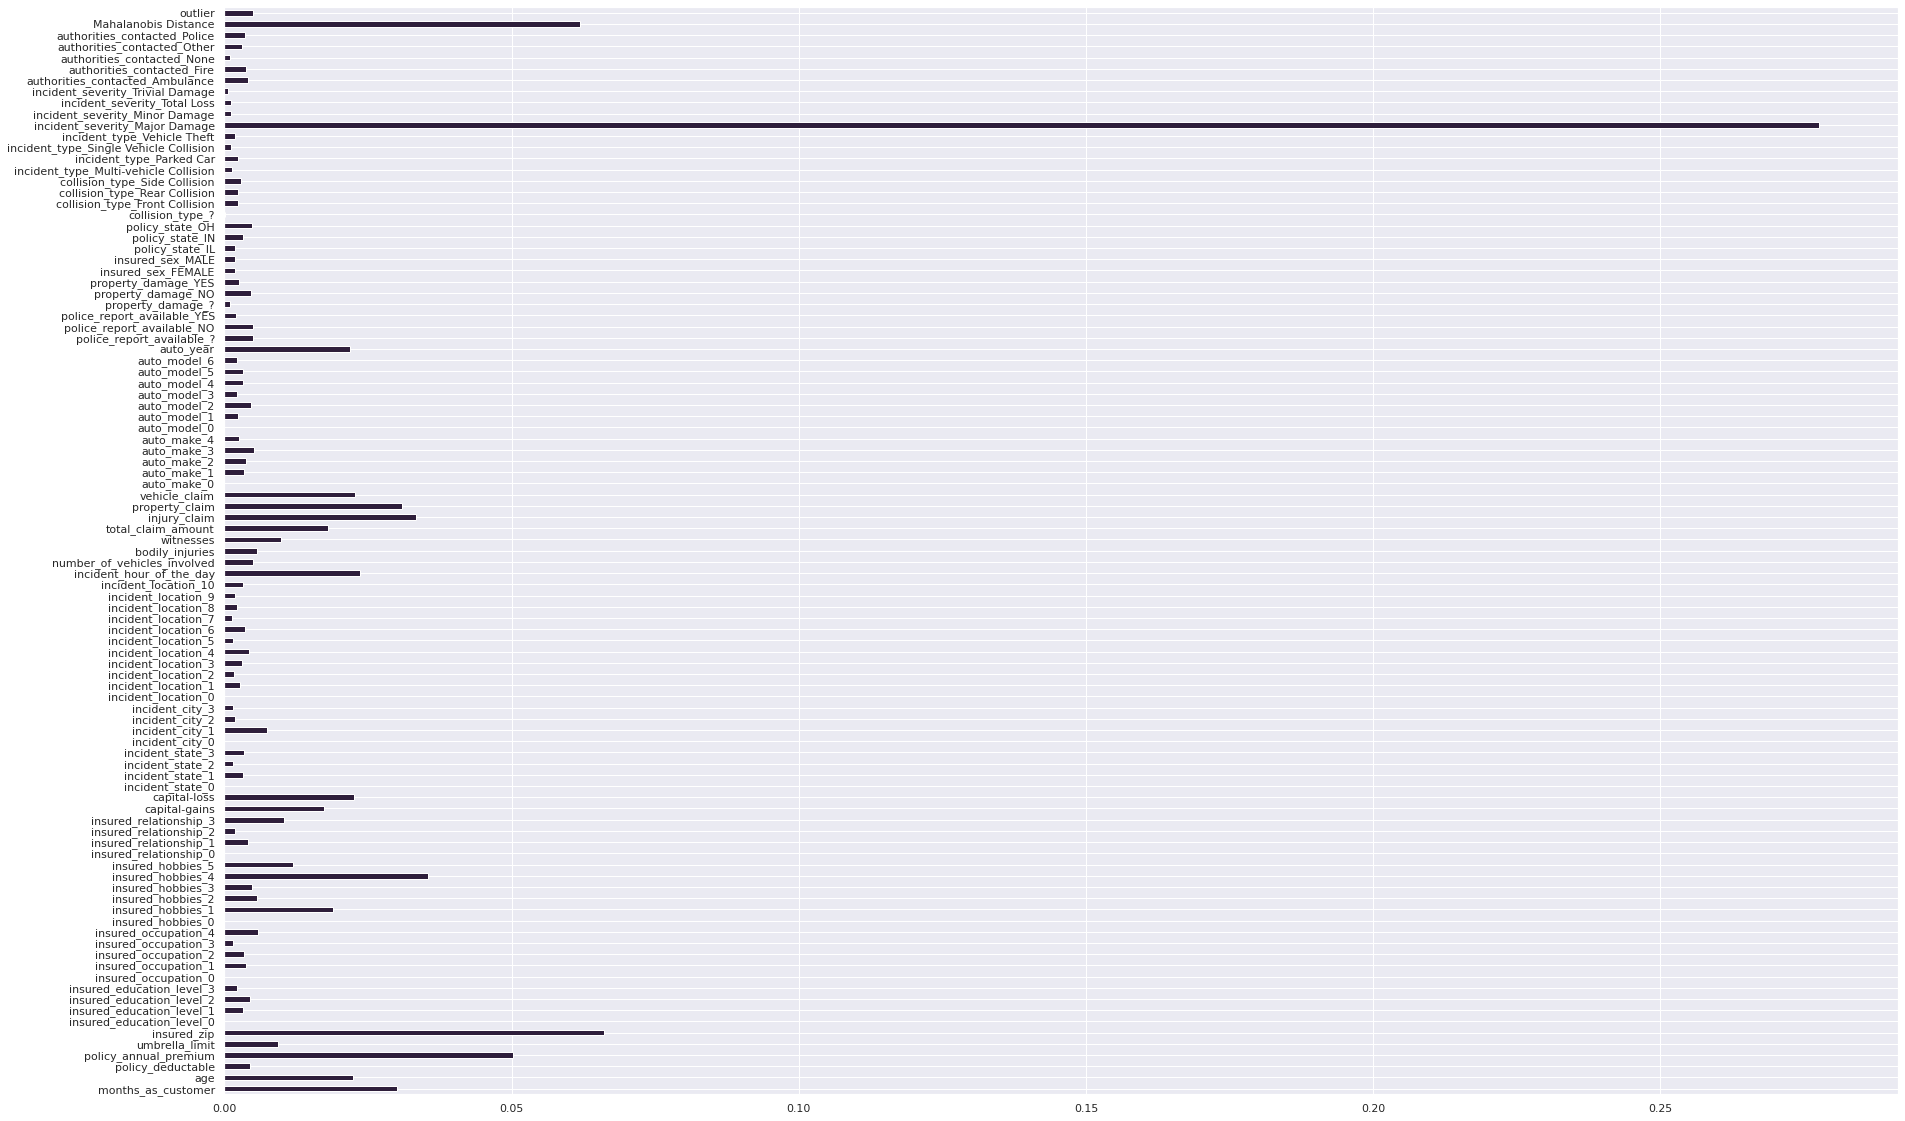

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(30,20))
feat_importances.plot(kind='barh')


# Outlier detection

Used Mahalanobis distance to detect outliers for multivariate data

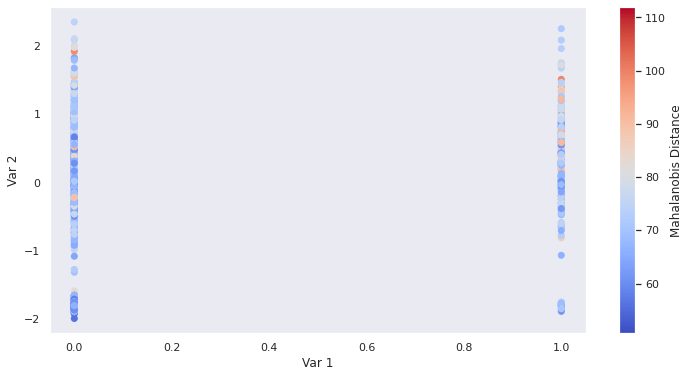

In [51]:
contamination = .4
el =EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, 
                                    contamination=contamination, random_state=0)
el.fit(data)
#column that measures Mahalanobis distance
data['Mahalanobis Distance'] = el.mahalanobis(data)
# Create scatterplot and color the anomalies differently
plt.figure(figsize = (12, 6))
ax = plt.scatter(data['fraud_reported'], data['total_claim_amount'], c = data['Mahalanobis Distance'], cmap = 'coolwarm')
plt.xlabel('Var 1')
plt.ylabel('Var 2')
plt.colorbar(label = 'Mahalanobis Distance')
plt.grid()

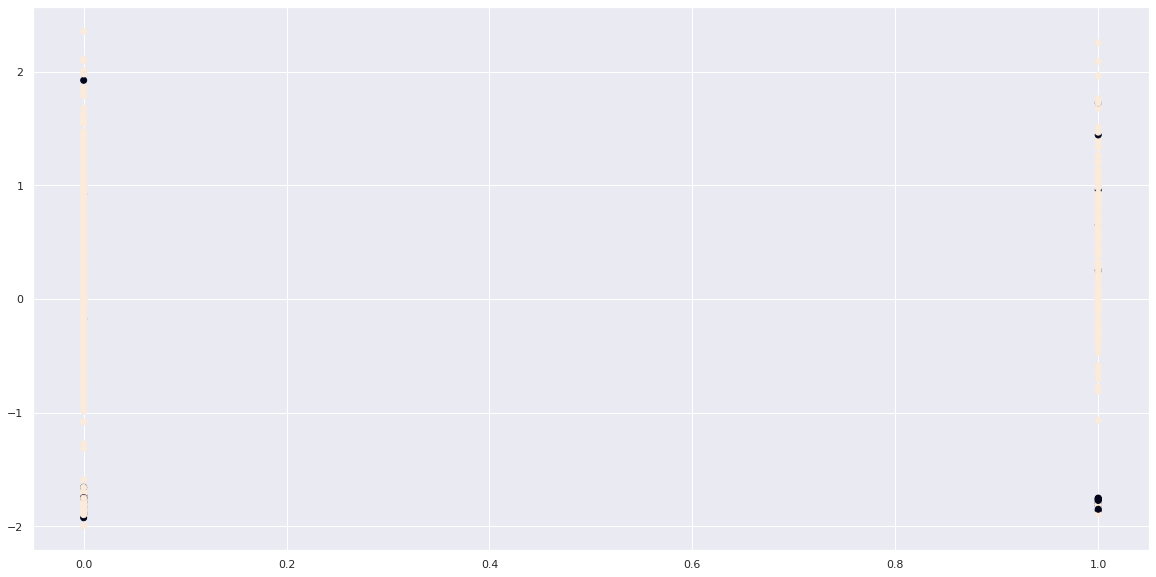

In [54]:
##apply an Isolation forest
outlier_detect = IsolationForest(n_estimators=100, max_samples=1000, contamination=.04, max_features=data.shape[1])
outlier_detect.fit(data)
outliers_predicted = outlier_detect.predict(data)

#check the results
data['outlier'] = outliers_predicted
plt.figure(figsize = (20,10))
plt.scatter(data['fraud_reported'], data['total_claim_amount'], c=data['outlier'])
plt.show()

In [ ]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = iforest.fit_predict(data['mahan'])

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]


# Model selection

In [81]:
X = data.drop(columns=['fraud_reported'], axis=1)
y = data['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [60]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.791667 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [61]:
lr = LogisticRegression(C= 100, penalty='l2', solver='newton-cg')
# fit the model with data
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Test Set:",lr.score(X_test, y_test))
print("Training Set:",lr.score(X_train, y_train))
print(classification_report(y_test,y_pred))


Test Set: 0.705
Training Set: 0.85125
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       145
           1       0.44      0.29      0.35        55

    accuracy                           0.70       200
   macro avg       0.60      0.58      0.58       200
weighted avg       0.67      0.70      0.68       200



In [59]:
dt = DecisionTreeClassifier(max_depth=13,criterion='gini')
#fit mdodel
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy:",dt.score(X_test, y_test))
print("Accuracy:",dt.score(X_train, y_train))
print(classification_report(y_test,y_pred))


Accuracy: 0.725
Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       145
           1       0.50      0.60      0.55        55

    accuracy                           0.73       200
   macro avg       0.67      0.69      0.67       200
weighted avg       0.74      0.72      0.73       200



In [64]:
#train Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",dt.score(X_test, y_test))
print("Accuracy:",dt.score(X_train, y_train))
print(classification_report(y_test,y_pred))


Accuracy: 0.725
Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.75      0.92      0.83       145
           1       0.48      0.20      0.28        55

    accuracy                           0.72       200
   macro avg       0.61      0.56      0.55       200
weighted avg       0.68      0.72      0.68       200



In [82]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))



Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       145
           1       0.50      0.38      0.43        55

    accuracy                           0.73       200
   macro avg       0.64      0.62      0.63       200
weighted avg       0.71      0.72      0.71       200

